##Insurance prediction

In this notebook i am trying to predict insurance cost of an person by looking into thier other attributes. This will be an supervised models. Notebook will start with some non deep leading models and gragually moving into deep learining models

#Importing Data

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


seems like some of the features are non numerical let us look into value count of non numerical feature

In [4]:
insurance.sex.value_counts()

,count
sex,
male,676
female,662


In [5]:
insurance.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [6]:
insurance.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


##Data Preprocessing

Here smoker and sex are having only two variables for it so for those two we will encode them into binary variable(0 or 1) . For the region we will go with on hot encoding

In [7]:
insurance['sex'] = insurance['sex'].map({'female':0,'male':1})
insurance['smoker'] = insurance['smoker'].apply(lambda x:1 if x=='yes' else 0)

In [8]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [9]:
insurance = insurance.join(pd.get_dummies(insurance['region'],dtype = int)).drop('region',axis = 1)

In [10]:
insurance.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


##Visualisation and Correlation

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'northeast'}>,
        <Axes: title={'center': 'northwest'}>,
        <Axes: title={'center': 'southeast'}>],
       [<Axes: title={'center': 'southwest'}>, <Axes: >, <Axes: >]],
      dtype=object)

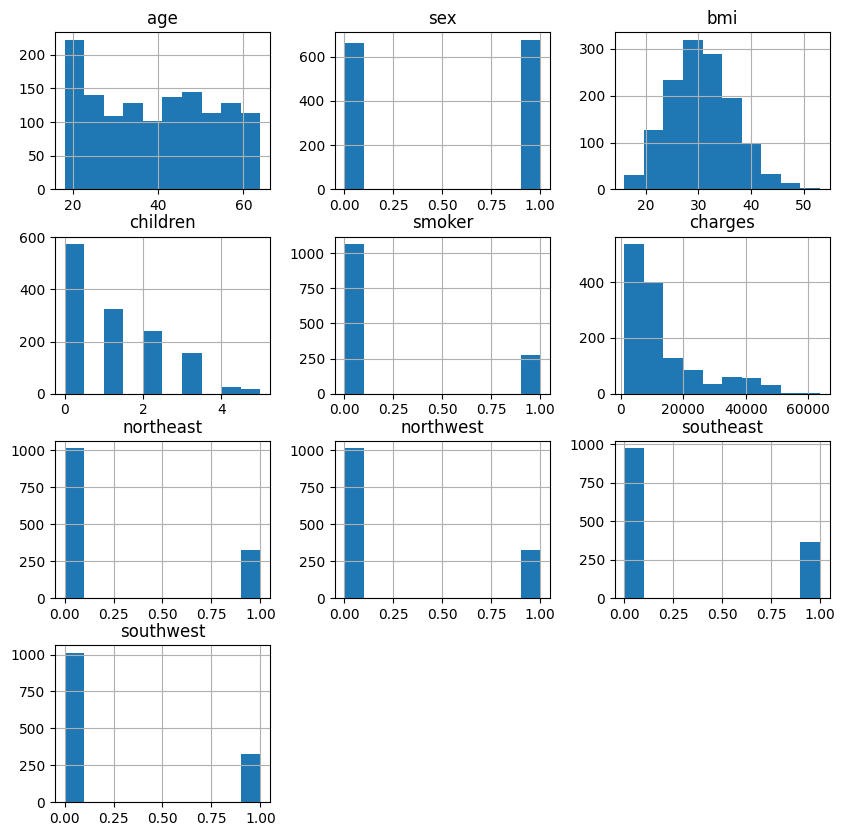

In [11]:
insurance.hist(figsize=(10,10))

In [12]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   int64  
 7   northwest  1338 non-null   int64  
 8   southeast  1338 non-null   int64  
 9   southwest  1338 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 104.7 KB


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
insurance.corr()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<Axes: >

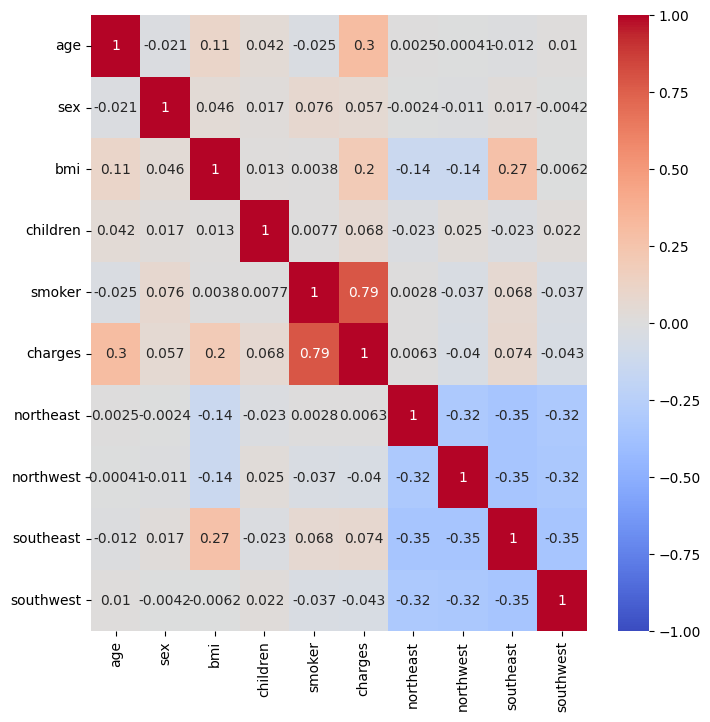

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(insurance.corr(),annot =True,cmap = 'coolwarm',vmin = -1,vmax =1)

There seems to be an correlation between smoker and charges

##Train Test split

In [16]:
from sklearn.model_selection import train_test_split

x = insurance.drop('charges',axis =1)
y = insurance['charges']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

##Model_1 Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor

model_1 = RandomForestRegressor()
model_1.fit(x_train,y_train)

RandomForestRegressor()

In [18]:
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,mean_squared_error

In [19]:
model_1.score(x_test,y_test)

0.8655432640106959

In [20]:
y_pred = model_1.predict(x_test)

In [21]:
rmae = root_mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

In [44]:
mae

2460.88028342018

In [22]:
def plots(y_test,y_pred,tit):
  plt.scatter(y_test,y_pred)
  plt.plot(y_test,y_test,'g')
  plt.xlabel('Charges')
  plt.ylabel('Predicted Charges')
  plt.title(tit)
  plt.show()


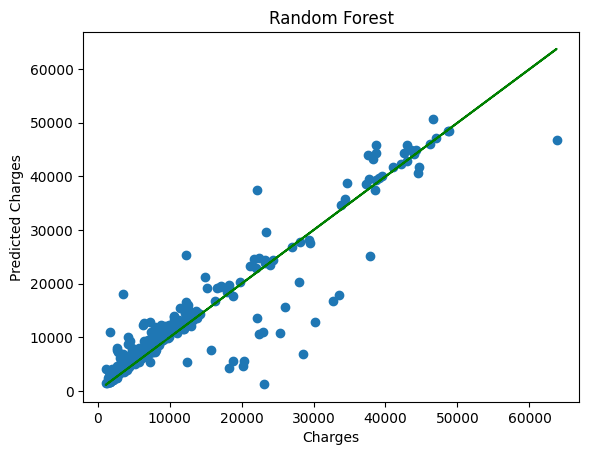

In [23]:
plots(y_test,y_pred,'Random Forest')

In [24]:
from sklearn.model_selection import GridSearchCV

paramgrid = {
      'max_depth' : [None,2,5],
      'n_estimators' : [100,200,500],
      'max_features' : ['auto','sqrt'],
      'min_samples_split' : [2,4,6],
      'min_samples_leaf' : [1,2,4]
}

grid_model_1 = GridSearchCV(model_1,param_grid = paramgrid,cv = 5,verbose = 2)

In [25]:
grid_model_1.fit(x_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 2, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [26]:
grid_model_1.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [27]:
grid_model_1.best_estimator_

RandomForestRegressor(max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=6, n_estimators=500)

In [28]:
grid_model_2 = grid_model_1.best_estimator_

In [29]:
grid_model_2.score(x_test,y_test)

0.8666579382882346

##Model 2 Deep learning

In [74]:
# Create training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42) # set random state for reproducible splits

In [85]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss= tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['mae']
)

model_3.fit(tf.expand_dims(x_train, axis=-1),y_train,epochs =10,verbose =0 )

In [46]:
model_3.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13212.9961 - mae: 13212.9961  


[12759.9267578125, 12759.9267578125]

In [51]:
y_preds = model_3.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
